In [1]:
import cv2
import matplotlib.pyplot as plt

**Showing an image**

In [ ]:
# ترتیب نوشتن سطر و ستون های اوپن سی وی

# سطر : بالا به پایین یا همون محور افقی | ستون : چپ به راست یا همون محور عمودی
# سطر : y | ستون : x

# در حالت عادی و خارج از اوپن سی وی اول یعنی در سمت چپ، ستون نوشته میشه و بعدش سطر یعنی
# x, y

# توی توابع گرافیکی اوپن سی وی مثل نوشتن متن یا کشیدن اشکال روی تصویر، اول ستون و بعد سطر میاد
# x, y

# توی دسترسی به تصویر یا برش تصویر، اول سطر و بعد ستون میاد
# y, x

# خوندن تصویر
image = cv2.imread('.\\images\\test\\open-cv.png')

# نمایش تصویر
cv2.imshow('open cv', image)

# کاربر تا زمانی که یه کلید رو فشار نداده پنجره بسته نشه
cv2.waitKey(0)

# بستن تمام پنجره های باز با زدن یه کلید روی کیبورد
cv2.destroyAllWindows()

**Color Space Transformation**

In [3]:
# تبدیل فضاهای رنگی

image = cv2.imread('.\\images\\test\\python.png')

# تبدیل رنگ ها
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # خاکستری
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # HSV
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB) # LAB

# نمایش تصاویر
cv2.imshow('original', image)
cv2.imshow('gray', gray_image)
cv2.imshow('hsv', hsv_image)
cv2.imshow('lab', lab_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

**Cropping and saving image**

In [4]:
# میخوایم یک تصویر رو با اندازه های دلخواه کراپ کنیم

image = cv2.imread('.\\images\\test\\python.png')

# نوع یک تصویر در اوپن سی وی، به صورت یک آرایه نامپای هست
print(type(image))
# نمایش شیپ یا همون اندازه تصویر
# خروجی سمت چپ تعداد سطر، خروجی وسط تعداد سطون و خروجی سمت راست، تعداد کانال های رنگی رو نشون میده که همون آر جی بی هست
print("Shape of the image :", image.shape)

# انتخاب سطر ها و ستون های مورد نظر برای کراپ
# [ستون ها, سطر ها]
# سطر : بالا به پایین | ستون : چپ به راست
crop = image[200:1200, 100:1000]

cv2.imshow('original', image)
cv2.imshow('crop', crop)

# ذخیره تصویر کراپ شده
cv2.imwrite('.\\images\\test\\cropped_python.png', crop)

cv2.waitKey(0)
cv2.destroyAllWindows()

<class 'numpy.ndarray'>
Shape of the image : (1317, 1200, 3)


**Resizing image**

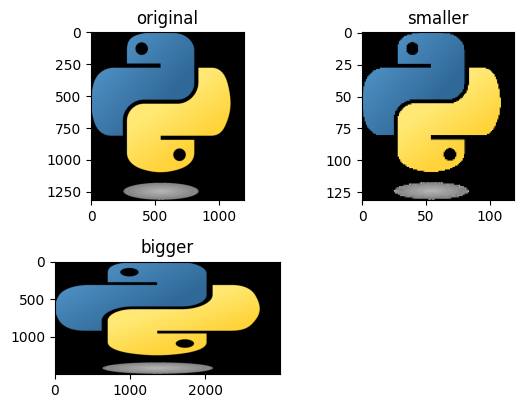

In [5]:
# ریسایز کردن تصویر و نمایش دادنش با مت پلات لیب

image = cv2.imread('.\\images\\test\\python.png')

# تبدیل به فضای رنگی آر جی بی برای نمایش صحیح توی مت پلات لیب
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ریسایز کردن تصویرمون

# اینجا میخوایم سایز عکسمون رو یک دهم کنیم
smaller = cv2.resize(image, (0, 0), fy=0.1, fx=0.1)

# ریسایز کردن بدون استفاده از نسبت ها
bigger = cv2.resize(image, (3000, 1500))

# نمایش تصاویر
titles = ['original', 'smaller', 'bigger']
images = [image, smaller, bigger]

for i in range(3): # 0, 1, 2
    plt.subplot(2, 2, i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
plt.show()

**Rotating image**

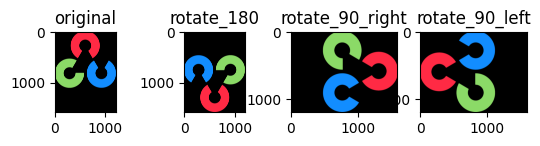

In [6]:
# چرخوندن تصویر

image = cv2.imread('.\\images\\test\\open-cv.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# روتیت کردن
rotate_180 = cv2.rotate(image, cv2.ROTATE_180) # چرخش 180 درجه
rotate_90_right = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE) # چرخش 90 درجه ساعتگرد
rotate_90_left = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE) # چرخش 90 درجه پاد ساعتگرد

# نمایش تصاویر

titles = ['original', 'rotate_180', 'rotate_90_right', 'rotate_90_left']
images = [image, rotate_180, rotate_90_right, rotate_90_left]

for i in range(4):
    plt.subplot(4, 4, i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
plt.show()

# حالا میخوایم با درجه دلخواه خودمون تصویر رو روتیت کنیم

# مشخص کردن مرکز تصویر
center = (image.shape[1]//2, image.shape[0]//2)

# center : مرکز تصویر
# angle : زاویه چرخش که پاد ساعتگرده
# scale : اندازه تصویر
rotation_matrix = cv2.getRotationMatrix2D(center=center, angle=30, scale=1)

rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

# نمایش تصویر روتیت شده
cv2.imshow('rotated_image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Splitting and merging color channels**

In [7]:
# جدا کردن و ترکیب کردن کانال های رنگی یک تصویر که همون بی جی آر هستن

image = cv2.imread('.\\images\\test\\python.png')

# جدا کردن کانال های رنگی
b, g, r = cv2.split(image)

# نمایش
cv2.imshow('original', image)
cv2.imshow('B', b)
cv2.imshow('G', g)
cv2.imshow('R', r)

cv2.waitKey(0)
cv2.destroyAllWindows()

# ترکیب کردن کانال های رنگی
# در واقع از ترکیب کانال های رنگی بی جی آر، تصویر اصلی به وجود میاد
merged_image = cv2.merge([b, g, r])

# نمایش دادنش
cv2.imshow('merged_image', merged_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

**Showing a video**

In [ ]:
# خوندن ویدئو و اجرا کردنش

video = cv2.VideoCapture('.\\videos\\test\\nature.mp4') # اگه به جای مسیر، 0 میزاشتیم وبکم باز میشد

# چک کردن اینکه ویدیو باز میشه یا نه
if not video.isOpened():
    print('Sorry, the video was not opened.')

# نمایش ویدیو

# یه حلقه مینویسیم که تا زمانی که ویدیو بازه یعنی هنوز بسته نشده، اجرا میشه
# با هر بار چرخش حلقه، یه فریم از ویدیو اجرا میشه
while video.isOpened():

    # ret : اگه فریم جدید با موفقیت خونده شه ترو میشه و اگه مشکلی باشه یا ویدیو تموم شده باشه فالس
    # frame : تصویر یا همون فریم مد نظر
    ret, frame = video.read()

    if ret:
        cv2.imshow('frame', frame)

    if ret == False:
        video.release() # بستن ویدیو
        cv2.destroyAllWindows()
        break

    # حالا میگیم بعد از هر فریم، 25 میلی ثانیه صبر کن
    # اینجوری هم سرعت ویدیو رو میتونیم تغییر بدیم هم اگه تو اون مدت کاربر روی کلید کیبوردی که توی اوپن سی وی 27 نامگذاری شده بزنه، وارد حلقه شه
    # ESC : اون دکمه
    if cv2.waitKey(25) == 27:
        video.release()
        cv2.destroyAllWindows()
        break

**Resizing a video**

In [9]:
# ریسایز کردن ویدیو

video = cv2.VideoCapture('.\\videos\\test\\nature.mp4')

if not video.isOpened():
    print('Sorry, the video was not opened.')

while video.isOpened():
    ret, frame = video.read()

    # ریسایز کردن
    
    # چون داریم تصویر رو ریسایز میکنیم، طبیعتا پیکسل های جدیدی به وجود میان
    # روش محاسبه رنگ این پیکسل ها رو با اینترپولیشن تعیین میکنیم
    # cv2.INTER_NEAREST : نزدیک‌ترین پیکسل (سریع ولی کیفیت پایین)
    # cv2.INTER_LINEAR : خطی (پیش‌فرض، مناسب بزرگ‌کردن)
    # cv2.INTER_AREA : میانگین‌گیری (مناسب کوچیک‌کردن)
    # cv2.INTER_CUBIC \ cv2.INTER_LANCZOS4 : کیفیت بالا برای بزرگ‌ کردن (ولی کندتر)
    frame = cv2.resize(frame, (0, 0), fy=0.5, fx=0.5, interpolation=cv2.INTER_AREA)

    if ret:
        cv2.imshow('frame', frame)
        
    if not ret:
        video.release()
        cv2.destroyAllWindows()
        break

    if cv2.waitKey(25) == 27:
        video.release()
        cv2.destroyAllWindows()
        break

**Saving a video**

In [10]:
# ذخیره کردن ویدئو

video = cv2.VideoCapture('.\\videos\\test\\nature.mp4')

ret, frame = video.read()

# فرمت ویدیو خروجی

# mp4v : یه روش فشرده سازی مخصوص اوپن سی ویه که باعث میشه فایل با فرمت ام پی فور ذخیره شه
# * : یه اپراتور پایتون هست که رشته رو به حروف تشکیل دهنده رشته تبدیل میکنه
# * : mp4v -> 'm', 'p', '4', 'v'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# پارامتر سوم و چهارم، تعداد فریم در ثانیه و شیپ فریم ها هستن
coppied_video = cv2.VideoWriter('.\\videos\\test\\coppied_nature.mp4', fourcc, 30, (frame.shape[1], frame.shape[0]))

while video.isOpened():
	ret, frame = video.read()
	
	if ret:
		coppied_video.write(frame) # نوشتن فریم ها توی ویدیو جدید
	else:
		break

coppied_video.release()
cv2.destroyAllWindows()


**Adding text message on an image**

In [31]:
# اضافه کردن نوشته روی تصویر

image = cv2.imread('.\\images\\test\\open-cv.png')

text = 'Open CV'
org = (500, 300) # محلی که تکست باید اونجا نوشته شه
font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
font_size = 3
color = (0, 0, 255)
thickness = 4 # ضخامت نوشته

texted_image = cv2.putText(image, text, org, font, font_size, color, thickness)

# نمایش تصویر
cv2.imshow('Texted Image', texted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Drawing a circle on an image**

In [12]:
# کشیدن دایره روی تصویر

image = cv2.imread('.\\images\\test\\python.png')

center = (300, 460) # مرکز دایره
radius = 20 # شعاع دایره
color = (0, 0, 255)
thickness = 3

circle_drawed_image = cv2.circle(image, center, radius, color, thickness)

cv2.imshow('Circle drawed image', circle_drawed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Drawing a line in an image**

In [13]:
# کشیدن خط روی تصویر

image = cv2.imread('.\\images\\test\\python.png')

start_point = (1000, 450) # نقطه شروع خط
end_point = (760, 100) # نقطه پایان خط
color = (0, 0, 255)
thickness = 3

line_drawed_image = cv2.line(image, start_point, end_point, color, thickness)

cv2.imshow('Line drawed image', line_drawed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Drawing a rectangle on an image**

In [14]:
# کشیدن مستطیل روی تصویر

image = cv2.imread('.\\images\\test\\open-cv.png')

start_point = (390, 250)
end_point = (1000, 100)
color = (0, 0, 255)
thickness = 3

rectangle_drawed_image = cv2.rectangle(image, start_point, end_point, color, thickness)

cv2.imshow('Rectangle drawed image', rectangle_drawed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Drawing an ellipse on an image**

In [15]:
# کشیدن بیضی روی تصویر

image = cv2.imread('.\\images\\test\\open-cv.png')

center = (400, 500) # مرکز بیضی
axes = (300, 200) # اندازه ضلع های بزرگ و کوچیک بیضی
angle = 45 # چرخش 45 درجه بیضی با جهت پاد ساعتگرد
start_angle = 0 # درجه شروع کشیدن بیضی که برای بیضی کامل 0 میزاریم
end_angle = 360 # درجه پایان بیضی که برای بیضی کامل 360 میزاریم
color = (0, 255, 0)
thickness = 2

ellipse_drawed_image = cv2.ellipse(image, center, axes, angle, start_angle, end_angle, color, thickness)

cv2.imshow('Ellipse drawed image', ellipse_drawed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Drawing a square on an image**

In [16]:
# کشیدن مربع روی تصویر
# توی اوپن سی وی، تابع مخصوصی برای این کار نیست پس با تابع مربوط به کشیدن مستطیل پیش میریم

image = cv2.imread('.\\images\\test\\open-cv.png')

# پارامتر ها
start_point = (400, 500)
side = 200 # طول اضلاع مربع
end_point = (start_point[0] + side, start_point[1] + side)
color = (0, 255, 0)
thickness = 4

square_drawed_image = cv2.rectangle(image, start_point, end_point, color, thickness)

cv2.imshow('Square drawed image', square_drawed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Face detection**

In [17]:
# قراره صورت فرد داخل تصویر رو پیدا کنیم و دورش یه مستطیل بکشیم

# از مدل موجود توی خود اوپن سی وی استفاده میکنیم
model = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

image = cv2.imread('.\\images\\test\\family.jpg')

# تشخیص چهره
# در واقع این کد مختصات چهره ها رو برمیگردونه
# minNeighbors = مقدار حساسیت مدل رو تعیین میکنه که اگه کم باشه ممکنه مدل نقاط پرت رو هم چهره در نظر بگیره
faces = model.detectMultiScale(image, minNeighbors=7)
print(faces)

# برای محاسبه تعداد چهره های توی تصویر
i = 0

# کشیدن مستطیل دور چهره‌ها
# چون ممکنه بیشتر از یه چهره داشته باشیم، از حلقه استفاده میکنیم
for x, y, w, h in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    i += 1

print(i)

# نمایش نتیجه
cv2.imshow('Detected Faces', image)

cv2.waitKey(0)
cv2.destroyAllWindows()

[[539 299 212 212]
 [297 178 226 226]
 [745 557 204 204]
 [203 389 186 186]]
4


**Face detection from webcam**

In [36]:
# تشخیص چهره با وبکم

model = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

video = cv2.VideoCapture(0)

if not video.isOpened():
    print('Sorry, the video was not opened.')

while video.isOpened():
    ret, frame = video.read()

    if ret:
        faces = model.detectMultiScale(frame, minNeighbors=3)
        i = 0
        for x, y, w, h in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            i += 1
            frame = cv2.putText(frame, f'Number of people: {i}', (10, 30), cv2.FACE_RECOGNIZER_SF_FR_COSINE, 1, (0, 255, 0), 2)
        cv2.imshow('Video', frame)

    if ret == False:
        video.release()
        cv2.destroyAllWindows()
        break

    if cv2.waitKey(25) == 27:
        video.release()
        cv2.destroyAllWindows()
        break

**Performing arithmetic operations on images**

In [18]:
# انجام عملیات حسابی روی تصاویر

image_1 = cv2.resize(cv2.imread('.\\images\\test\\color-1.jpg'), (500, 700))
image_2 = cv2.resize(cv2.imread('.\\images\\test\\color-2.jpg'), (500, 700))

# انجام عملیات حسابی
additional = cv2.add(image_1, image_2)
subtract = cv2.subtract(image_1, image_2) # پیکسل های تصویر اول منهای پیکسل های تصویر دوم
multiplication = cv2.multiply(image_1, image_2)
division = cv2.divide(image_1, image_2)

# نمایش تصاویر
cv2.imshow('Original 1', image_1)
cv2.imshow('Original 2', image_2)
cv2.imshow('Additional', additional)
cv2.imshow('Subtract', subtract)
cv2.imshow('Multiplication', multiplication)
cv2.imshow('Division', division)

cv2.waitKey(0)
cv2.destroyAllWindows()